Final: [ 25.  92. 172. 134.  82. 132.  65.  46. 109. 172.] 88.89


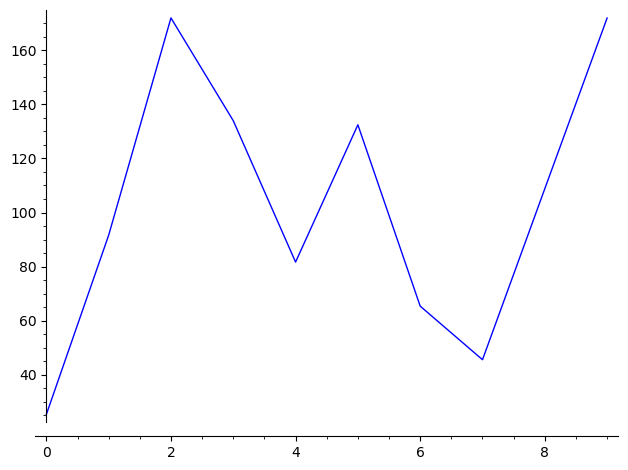

In [1]:
import math
import random
import numpy
from sage.plot.histogram import Histogram
b = 50
l = 500
P = 700
n = 10
x=[]
for i in range(0,n):
    x.append(0+i*50)
def Sigma(x, h):
    f = []
    for t in range(0,n):
        sigma = (P*(l - x[t])*h[t]*0.5)/((b*h[t]*h[t]*h[t])/12)
        f.append(sigma)
    return f
def F(f):        
    S = 0     
    for i in range(0,n):
        S = S+f[i]
    return S

alpha = []
for i in range(0,n):
  alpha.append(0.8)
beta = []
for i in range(0,n):
  beta.append(0.2)
gamma = []
for i in range(0,n):
  gamma.append(0.2)

nabor = [[random.uniform(20,200) for j in range(0,n)] for i in range(0,n)]
znach = []
for i in range(0,n):
    znach.append(F(Sigma(x,nabor[i])))

minT = []
for i in range(1,n+1):
  minT.append(20)    

delta = []
for i in range(0,n+1):
  delta.append(0)


min_index = znach.index(min(znach))  

iter = 0
while iter < 1000:
  #nabor = [[random.uniform(20,200) for j in range(0,n)] for i in range(0,n)]
  #znach = []
  #for i in range(0,n):
    #znach.append(F(Sigma(x,nabor[i])))
  #min_index = znach.index(min(znach))
  minG = nabor[min_index]
  #print('minG:',numpy.around(minG), round(F(Sigma(x,minG)),4))
  eps1 = []
  for i in range(0,n):
    eps1.append(random.uniform(0,1))
  eps2 = []
  for i in range(0,n):
    eps2.append(random.uniform(0,1))
    
  for i in range(0,n):
    for j in range(1,n):
     delta[j] = alpha[j]*delta[j-1] + beta[j]*eps1[j]*(minG[j] - nabor[i][j]) + gamma[j]*eps2[j]*(minT[j] - nabor[i][j])
     #print(delta[j])
  for i in range(0,n):
    for j in range(0,n):
     nabor[i][j] = nabor[i][j]+delta[j]
    
  for i in range(0,n):
    for j in range(0,n):
        if nabor[i][j]<=20:
            nabor[i][j]=20;
        if nabor[i][j]>=200:
            nabor[i][j]=200;
    
  for i in range(0,n):
     znach[i] = F(Sigma(x, nabor[i]))
        
  min_index = znach.index(min(znach))
  
  if F(Sigma(x,nabor[min_index]))>F(Sigma(x,minG)):
    minT=minG
  elif F(Sigma(x,nabor[min_index]))<=F(Sigma(x,minG)):
    minT=nabor[min_index]

  iter = iter+1  
  #print('minT:',numpy.around(minT), round(F(Sigma(x,minT)),4))
  

print('Final:', numpy.around(minT), round(F(Sigma(x,minT)),4))

list_plot(minT, plotjoined=True)

In [ ]:
import math
import random
import numpy

def F(x): return (x**2)*(2+abs(math.sin(8*x)))

n = 10
eps1 = []
for i in range(0,n):
  eps1.append(random.uniform(0,1))
eps2 = []
for i in range(0,n):
  eps2.append(random.uniform(0,1))
a = []
for i in range(0,n):
  a.append(0.9)
b = []
for i in range(0,n):
  b.append(0.2)
c = []
for i in range(0,n):
  c.append(0.2)

nabor = []
for i in range(0,n):
  nabor.append(random.uniform(-10,10))

znach = []
for y in nabor:
  znach.append(F(y))


minT = 0
min_index = znach.index(min(znach))

delta = []
for i in range(0,n):
  delta.append(0)

iter = 0
while iter <500:

  minG = nabor[min_index]
  for i in range(0,n):
     delta[i] = a[i]*delta[i] + b[i]*eps1[i]*(minG - nabor[i]) + c[i]*eps2[i]*(minT - nabor[i])

  for i in range(0,n):
     nabor[i] = nabor[i]+delta[i]

  for i in range(0,n):
     znach[i] = F(nabor[i])

  min_index = znach.index(min(znach))

  if F(nabor[min_index])>F(minG):
     minT = minG
  else:
     minT = nabor[min_index]
        
    
  iter = iter+1

print(minT, F(minT))
list_plot(minT, plotjoined=True)

In [3]:
import math
import random
import numpy
from collections import OrderedDict
def F(x,y,z):
    return (1-x)**2 + (1-y)**2 + 100*((y-x**2)**2) + 100*((z-y**2)**2)
M = 100
Mcrit = 75
def Valid(x,y,z):
    return 1/(1+F(x,y,z))
X = [[random.uniform(-5,5),random.uniform(-5,5), random.uniform(-5,5)] for i in [0..M-1]]
for i in [0..M-1]:
    X[i].append(Valid(X[i][0], X[i][1], X[i][2]))
iter = 0
while iter<3000:
    X = sorted(X, key = lambda X:X[3], reverse=True)
    #print(X[0])
    for i in [1..M-Mcrit-1]:
        for j in [2..M-Mcrit]:
            #eps = random.uniform(0,1)
            p = Valid(X[i][0], X[i][1], X[i][2])/(Valid(X[i][0], X[i][1], X[i][2]) + Valid(X[j][0], X[j][1], X[j][2]))
            for k in [0,1,2]:
                eps = random.uniform(0,1)
                if eps <= p:
                    X[i][k] = X[i][k]
                if eps > p:
                    X[i][k] = X[j][k]
    for i in [1..M-Mcrit-1]:
        X[i][3] = Valid(X[i][0], X[i][1], X[i][2])
    X = sorted(X, key = lambda X:X[3], reverse=True)    
    for i in [M-Mcrit..M-1]:
        X[i] = [random.uniform(-5,5),random.uniform(-5,5), random.uniform(-5,5)]
    for i in [M-Mcrit..M-1]:
        X[i].append(Valid(X[i][0], X[i][1], X[i][2]))
    iter = iter+1
    
    
print("X:", round(X[0][0],5), ";", "Y:", round(X[0][1],5), ";", "Z:", round(X[0][2],5), 'F:',round(F(X[0][0], X[0][1], X[0][2]),5))    

X: 1.00035 ; Y: 0.994 ; Z: 0.97622 F: 0.01847


In [5]:
import math
import random
import numpy
from collections import OrderedDict
from sage.plot.histogram import Histogram
b = 50
l = 500
P = 700
n = 10
x = []
for i in [0..n-1]:
    x.append(0+i*50)
    
def F(x, h):
    f = []
    for t in [0..n-1]:
        f.append((P*(l - x[t])*h[t]*0.5)/((b*h[t]*h[t]*h[t])/12))       
    S = 0     
    for o in [0..n-1]:
        S = S+f[o]
    return S

M = 100
Mcrit = 75

def Valid(x, h):
    return 1/(1+F(x, h))

H = [[random.uniform(20,200) for j in [0..n-1]] for i in [0..M-1]]
for i in [0..M-1]:
    H[i].append(Valid(x, H[i]))
    
iter = 0
while iter<1000:
    H = sorted(H, key = lambda H:H[n], reverse=True)
    #print(X[0])
    for i in [1..M-Mcrit-1]:
        for j in [2..M-Mcrit]:
            #eps = random.uniform(0,1)
            p = Valid(x, H[i])/(Valid(x, H[i]) + Valid(x, H[j]))
            for k in [0..n-1]:
                eps = random.uniform(0,1)
                if eps <= p:
                    H[i][k] = H[i][k]
                if eps > p:
                    H[i][k] = H[j][k]
    for i in [1..M-Mcrit-1]:
        H[i][n] = Valid(x, H[i])
    H = sorted(H, key = lambda H:H[n], reverse=True)    
    for i in [M-Mcrit..M-1]:
        H[i] = [random.uniform(20,200) for j in [0..n-1]]
    for i in [M-Mcrit..M-1]:
        H[i].append(Valid(x, H[i]))
    iter = iter+1

In [6]:
H[0]

[183.26128535381497,
 192.30961177722818,
 170.73085726356442,
 184.147310013189,
 192.24846068036067,
 159.3677841307229,
 183.63730571887544,
 146.19772623098063,
 175.14695502253608,
 174.97137547918564,
 0.120486033231039]

Final: 7.2997


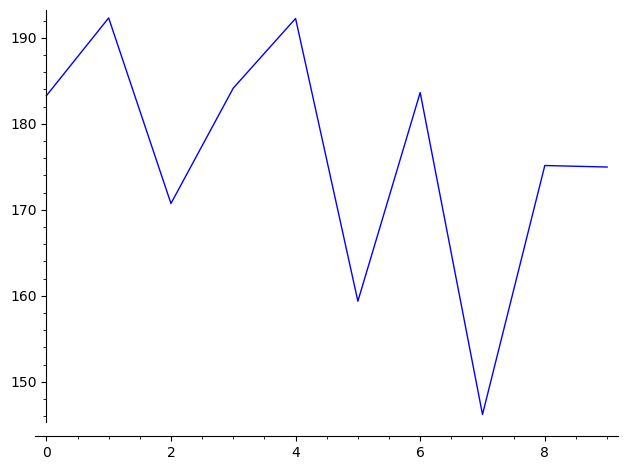

In [7]:
K = H[0].pop()
print('Final:', round(F(x,H[0]),4))
list_plot(H[0], plotjoined=True) 

In [11]:
S = Spline(H[0])

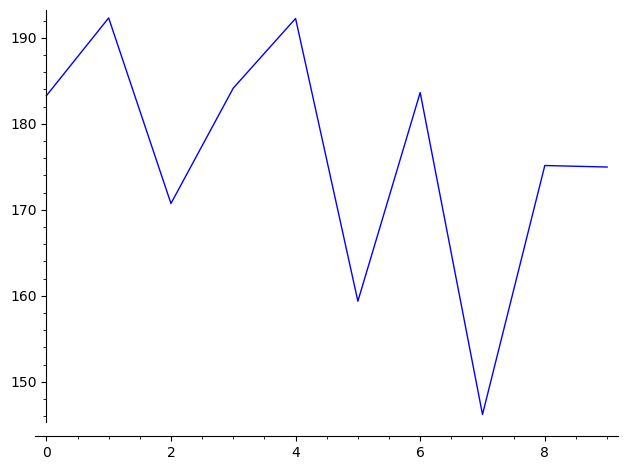

In [9]:
list_plot(S, plotjoined=True) 